# Hourly Energy Consumption

## Step 1:

#### Import Library

In [1]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [2]:
pip install scikeras

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pprint
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
%matplotlib inline

In [4]:
df = pd.read_csv("AEP_hourly.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")


First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



# Step 2:
## Reformat the Date Time Columns

In [5]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)


AttributeError: 'DatetimeProperties' object has no attribute 'week'

# Step 3:

In [ ]:
# How many Unique Year do we Have in Dataset
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



### Lets us see the energy consumption Each Year

Text(0.5, 1.0, 'Energy Consumption According to Year')

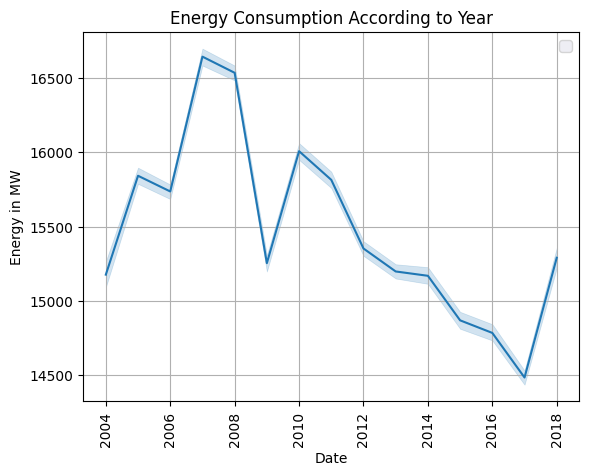

In [ ]:


from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

<ipython-input-7-0608ff1e5b3b>:13: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2004 = dataset["2004"]["AEP_MW"].to_list()
<ipython-input-7-0608ff1e5b3b>:14: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x_2004 = dataset["2004"]["Date"].to_list()
<ipython-input-7-0608ff1e5b3b>:18: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2005 = dataset["2005"]["AEP_MW"].to_list()
<ipython-input-7-0608ff1e5b3b>:19: FutureWarning: Indexing a DataFrame with a datetimelike index using a single strin

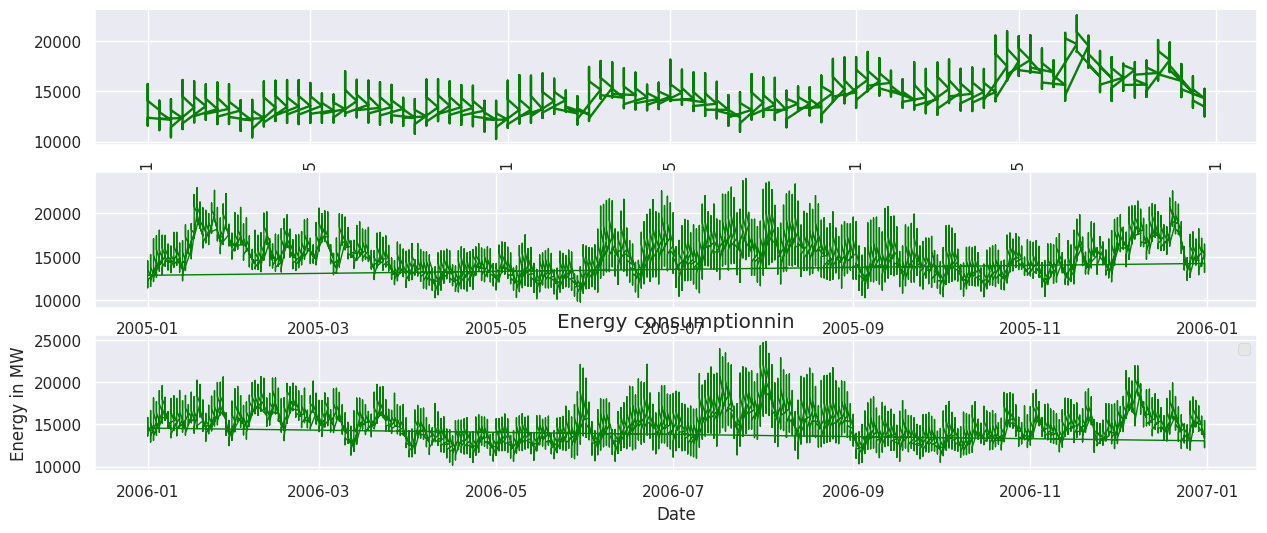

In [ ]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2004 = dataset["2004"]["AEP_MW"].to_list()
x_2004 = dataset["2004"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)


y_2005 = dataset["2005"]["AEP_MW"].to_list()
x_2005 = dataset["2005"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)


y_2006 = dataset["2006"]["AEP_MW"].to_list()
x_2006 = dataset["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


### Energy Distribution

<ipython-input-8-9e2b01b149bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["AEP_MW"])


Text(0.5, 1.0, 'Ennergy Distribution')

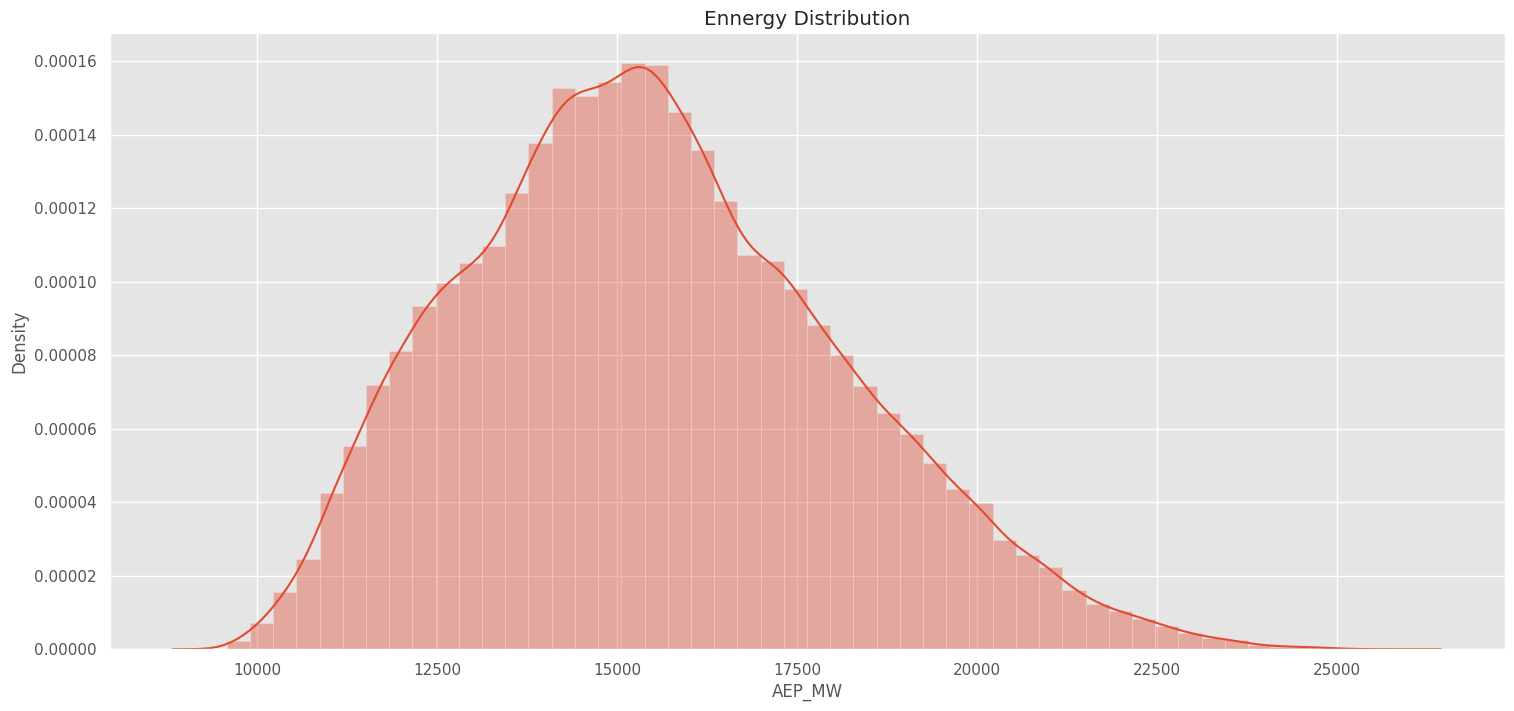

In [ ]:
sns.distplot(dataset["AEP_MW"])
plt.title("Ennergy Distribution")

# Energy with Respect to Time

In [ ]:
df.head()

,Datetime,AEP_MW,Month,Year,Date,Time,Week,Day
0,2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
1,2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2,2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
3,2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
4,2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday


# Resampleing Data

In [ ]:
NewDataSet = dataset.resample('D').mean()

/var/folders/xl/05qd9gls0g3g3t6t195lkdfc0000gn/T/ipykernel_66617/2859532632.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NewDataSet = dataset.resample('D').mean()


In [ ]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 7)
New  Dataset  (5055, 4)


In [ ]:
NewDataSet.head()


,AEP_MW,Month,Year,Week
Datetime,,,,
2004-10-01,14284.521739,10.0,2004.0,40.0
2004-10-02,12999.875000,10.0,2004.0,40.0
2004-10-03,12227.083333,10.0,2004.0,40.0
2004-10-04,14309.041667,10.0,2004.0,41.0
2004-10-05,14439.708333,10.0,2004.0,41.0


In [ ]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]


In [ ]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)


Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [ ]:
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [ ]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END
for i in range(60, Train.shape[0]):

    # X_Train 0-59
    X_Train.append(Train[i-60:i])

    # Y Would be 60 th Value based on past 60 Values
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [ ]:
X_Train.shape

(4935, 60, 1)

In [ ]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

# Model

In [ ]:

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
print(regressor.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
regressor.fit(X_Train, Y_Train, epochs = 100, batch_size = 32)

Epoch 1/100
155/155 [==============================] - 31s 130ms/step - loss: 0.0230
Epoch 2/100
155/155 [==============================] - 19s 120ms/step - loss: 0.0182
Epoch 3/100
155/155 [==============================] - 21s 134ms/step - loss: 0.0174
Epoch 4/100
155/155 [==============================] - 19s 119ms/step - loss: 0.0165
Epoch 5/100
155/155 [==============================] - 21s 134ms/step - loss: 0.0161
Epoch 6/100
155/155 [==============================] - 19s 121ms/step - loss: 0.0155
Epoch 7/100
155/155 [==============================] - 19s 124ms/step - loss: 0.0149
Epoch 8/100
155/155 [==============================] - 18s 119ms/step - loss: 0.0137
Epoch 9/100
155/155 [==============================] - 20s 126ms/step - loss: 0.0115
Epoch 10/100
155/155 [==============================] - 18s 119ms/step - loss: 0.0103
Epoch 11/100
155/155 [==============================] - 21s 135ms/step - loss: 0.0092
Epoch 12/100
155/155 [==============================] - 18s 119

naya code


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import math

In [ ]:
# Make predictions on your test data
Y_Pred = regressor.predict(X_Test)

# Calculate metrics
Mse = mean_squared_error(Y_Test, Y_Pred)
Rmse = math.sqrt(mse)
Mae = mean_absolute_error(Y_Test, Y_Pred)
Mape = np.mean(np.abs((Y_Test - Y_Pred) / Y_Test)) * 100

# Print metrics
print('Mean Squared Error: ', Mse)
print('Root Mean Squared Error: ', Rmse)
print('Mean Absolute Error: ', Mae)
print('Mean Absolute Percentage Error: ', Mape)

2/2 [==============================] - 2s 24ms/step
Mean Squared Error:  0.0027950039136473382
Root Mean Squared Error:  3.846646399262989
Mean Absolute Error:  0.042108857733695104
Mean Absolute Percentage Error:  11.114449659139911


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_Test, Y_Pred)
print('R2 Score: ', r2 * 100)

R2 Score:  72.401173842994


In [ ]:
# Calculate metrics
Mse = round(mean_squared_error(Y_Test, Y_Pred), 4)
Rmse = round(math.sqrt(mse), 4)
Mae = round(mean_absolute_error(Y_Test, Y_Pred), 4)
Mape = round(np.mean(np.abs((Y_Test - Y_Pred) / Y_Test)) * 100, 2)

# Print metrics
print('Mean Squared Error: ', Mse)
print('Root Mean Squared Error: ', Rmse)
print('Mean Absolute Error: ', Mae)
print('Mean Absolute Percentage Error: ', Mape)

Mean Squared Error:  0.0028
Root Mean Squared Error:  3.8466
Mean Absolute Error:  0.0421
Mean Absolute Percentage Error:  11.11


In [ ]:
TestData = TestData.iloc[:, 0:1]  # select only the first column
TestData = sc.transform(TestData.values)

In [ ]:
# Assuming 'NewDataSet' is your full dataset
Training_Set_all_features = NewDataSet.iloc[:-60, :]  # select all columns and all but the last 60 records

# Scale the data
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set_all_features)

In [ ]:
X_Test = []
Y_Test = []

for i in range(60, TestData.shape[0]):
    X_Test.append(TestData[i-60:i])
    Y_Test.append(TestData[i])

X_Test = np.array(X_Test)
Y_Test = np.array(Y_Test)

In [ ]:
X_Test = np.reshape(X_Test, (X_Test.shape[0], X_Test.shape[1], 1))

In [ ]:
loss = regressor.evaluate(X_Test, Y_Test)
print('Test loss:', loss)

2/2 [==============================] - 4s 50ms/step - loss: 0.0029
Test loss: 0.0028738868422806263


In [ ]:
# Assuming you have binary classification
# Define a threshold for classifying predictions
threshold = 0.5  # You can adjust this threshold based on your problem

# Convert predictions to binary outcomes based on the threshold
binary_predictions = (Y_Pred > threshold).astype(int)
binary_ground_truth = (Y_Test > threshold).astype(int)

# Calculate accuracy
accuracy = np.mean(binary_predictions == binary_ground_truth)

# Calculate precision
true_positives = np.sum(binary_predictions & binary_ground_truth)
predicted_positives = np.sum(binary_predictions)
precision = true_positives / predicted_positives if predicted_positives != 0 else 0

# Calculate recall
actual_positives = np.sum(binary_ground_truth)
recall = true_positives / actual_positives if actual_positives != 0 else 0

# Print metrics
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)


Accuracy:  0.875
Precision:  0.6666666666666666
Recall:  0.75


naya code

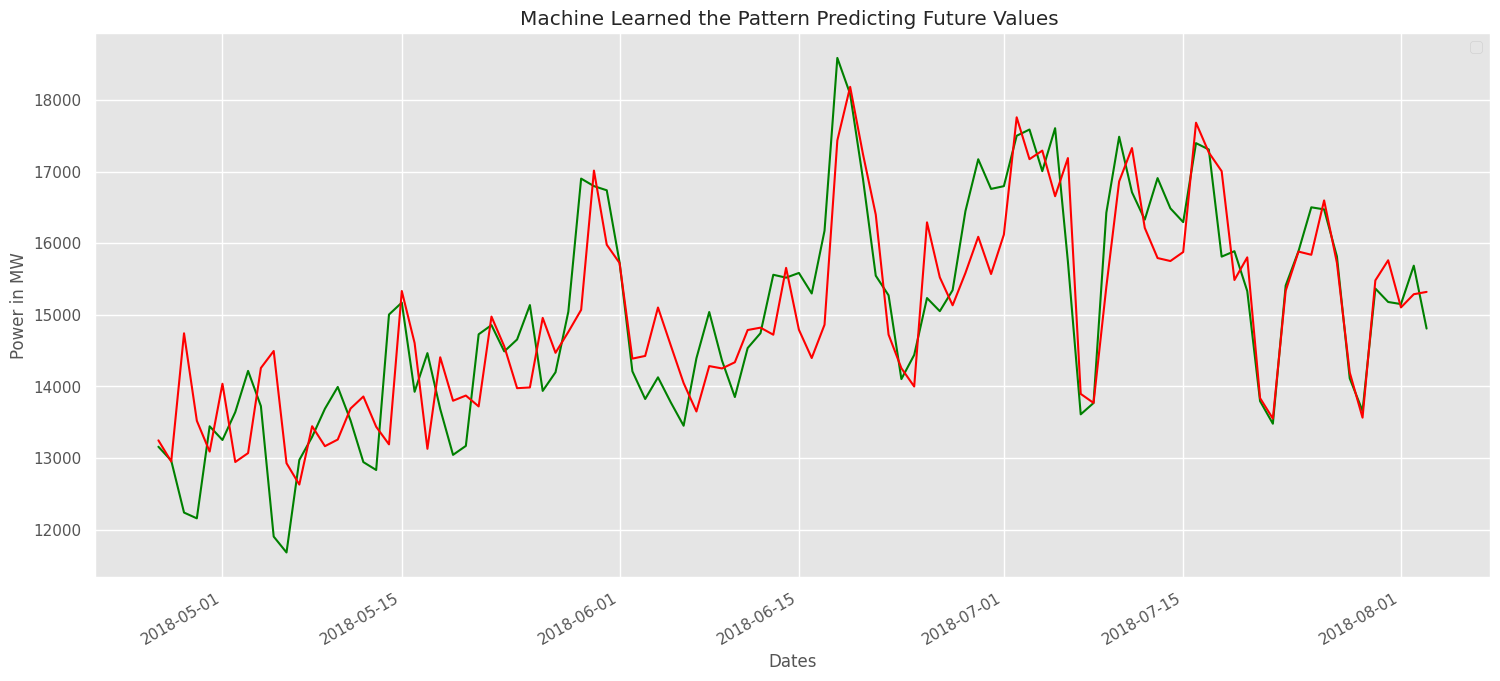

In [ ]:

fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()


XGBOOST

In [ ]:
X, y = NewDataSet.iloc[:, :-1], NewDataSet.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=123)


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)

newww

In [ ]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid to search over
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
}

# Create an instance of XGBRegressor
regressor = xgb.XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid,
                           scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(train_X, train_y)

# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 367, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Library/Frameworks/Pyt

KeyboardInterrupt: 

In [ ]:
regressor1=xgboost.XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None,subsample= 0.5, random_state=None)

In [ ]:
regressor1.fit(train_X,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor1,train_X,train_y,cv=10)

In [ ]:
from sklearn.metrics import r2_score

# Assuming you have already fitted your regressor1 and you have test_X and test_y
predictions = regressor1.predict(test_X)

# Calculate R2 score
r2 = r2_score(test_y, predictions)

print("R-squared (R2) Score:", r2)


R-squared (R2) Score: 0.9273831941637173


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Assuming you have binary classification problem

# Convert predicted probabilities to binary predictions based on a threshold
threshold = 0  # Adjust threshold as needed
binary_predictions = [1 if val > threshold else 0 for val in predictions]

# Calculate precision
precision = precision_score(test_y, binary_predictions, average='micro')

# Calculate recall
recall = recall_score(test_y, binary_predictions, average='micro')

# Calculate accuracy
accuracy = accuracy_score(test_y, binary_predictions)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.025708635464733027
Recall: 0.025708635464733027
Accuracy: 0.025708635464733027


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test set
predictions = regressor1.predict(test_X)

# Calculate MSE
mse = mean_squared_error(test_y, predictions)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(test_y, predictions)

# Calculate MAPE
mape = np.mean(np.abs((test_y - predictions) / test_y)) * 100

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)


Mean Squared Error: 16.2252801004217
Root Mean Squared Error: 4.028061581011603
Mean Absolute Error: 2.0700396529215297
Mean Absolute Percentage Error: 36.555644594131124


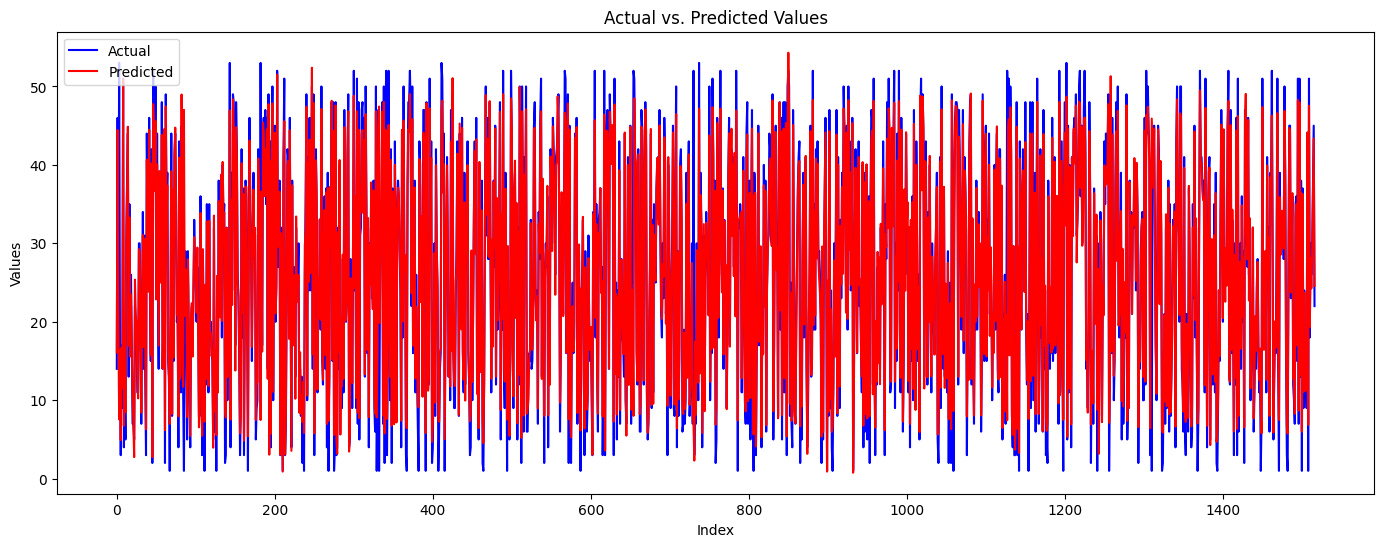

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the test data
predictions = regressor1.predict(test_X)

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(17, 6))

# Plot the predicted values
ax.plot(range(len(test_y)), test_y, color='blue', label='Actual')
ax.plot(range(len(predictions)), predictions, color='red', label='Predicted')

# Set labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Values')
ax.set_title('Actual vs. Predicted Values')

# Add legend
ax.legend()

# Show the plot
plt.show()


FB PROPHET



In [6]:
#importing the libraries

import pandas as pd
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df = pd.read_csv("/content/AEP_hourly.csv")

In [8]:
import pandas as pd

# Assuming df contains your DataFrame with "Datetime" column
df['Datetime'] = pd.to_datetime(df['Datetime'])  # Convert 'Datetime' column to datetime format if it's not already

# Set 'Datetime' column as index
df.set_index('Datetime', inplace=True)

# Now 'Datetime' column is the index of your DataFrame


In [9]:
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [10]:
df = df[['AEP_MW']]
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [11]:
print('Total No. of null values:',df.isnull().sum())
df_cleaned = df.dropna()
print('Shape of the data', df_cleaned.shape)

Total No. of null values: AEP_MW    0
dtype: int64
Shape of the data (121273, 1)


In [12]:
#adding some more columns for analysing the behaviour of energy consumption

df_cleaned['Day'] = df_cleaned.index.day
df_cleaned['Dow'] = df_cleaned.index.day_of_week
df_cleaned['Year'] = df_cleaned.index.year
df_cleaned['quarter'] = df_cleaned.index.quarter
df_cleaned['hour'] = df_cleaned.index.hour
df_cleaned['month'] = df_cleaned.index.month

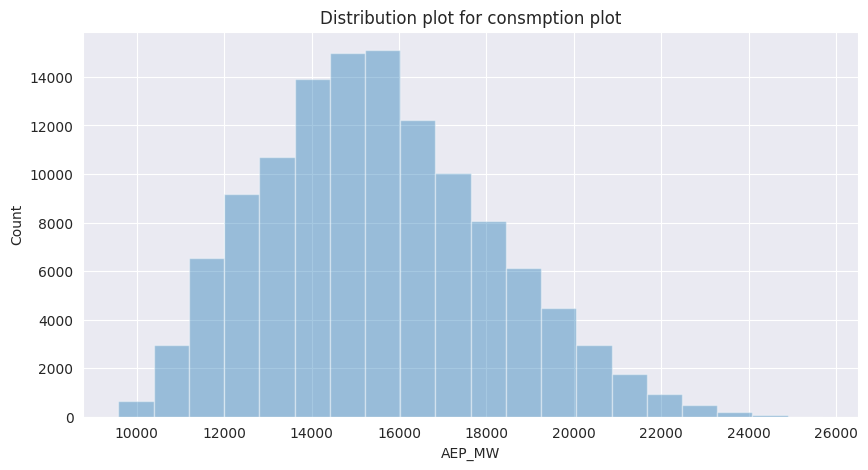

In [ ]:
plt.figure(figsize= (10, 5))

plt.title('Distribution plot for consmption plot')
plt.ylabel('Count')
sns.distplot(df_cleaned['AEP_MW'], bins = 20, kde = False)

plt.show()

In [20]:
#normalizing the values

scaler = MinMaxScaler()
x = scaler.fit_transform(df_cleaned['AEP_MW'].values.reshape(-1,1))
df_cleaned['AEP_MW'] = x
print(df_cleaned.head())
df_cleaned.tail()

                       AEP_MW  Day  Dow  Year  quarter  hour  month
Datetime                                                           
2004-12-31 01:00:00  0.241839   31    4  2004        4     1     12
2004-12-31 02:00:00  0.203798   31    4  2004        4     2     12
2004-12-31 03:00:00  0.185925   31    4  2004        4     3     12
2004-12-31 04:00:00  0.182202   31    4  2004        4     4     12
2004-12-31 05:00:00  0.191697   31    4  2004        4     5     12


,AEP_MW,Day,Dow,Year,quarter,hour,month
Datetime,,,,,,,
2018-01-01 20:00:00,0.714162,1,0,2018,1,20,1
2018-01-01 21:00:00,0.708576,1,0,2018,1,21,1
2018-01-01 22:00:00,0.697468,1,0,2018,1,22,1
2018-01-01 23:00:00,0.672335,1,0,2018,1,23,1
2018-01-02 00:00:00,0.646146,2,1,2018,1,0,1


In [21]:
int(len(df_cleaned) * 0.85)

103082

In [22]:
train = df_cleaned[:103082]
test = df_cleaned[103082:]
print('Training length:', len(train))
print('Testing length:', len(test))

Training length: 103082
Testing length: 18191


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [24]:
new_df = df[['AEP_MW']]
new_df = new_df.dropna()
new_df['date'] = new_df.index
new_df.reset_index(drop = True, inplace = True)
new_df = new_df.rename(columns = {'date':'ds','AEP_MW':'y'})

x = scaler.fit_transform(new_df['y'].values.reshape(-1,1))
new_df['y'] = x

print(new_df.head())
train = new_df[:103082]
test = new_df[103082:]

          y                  ds
0 -0.780089 2004-12-31 01:00:00
1 -1.016642 2004-12-31 02:00:00
2 -1.127779 2004-12-31 03:00:00
3 -1.150933 2004-12-31 04:00:00
4 -1.091891 2004-12-31 05:00:00


In [25]:
mod = Prophet()
mod.fit(train)
pred = mod.predict(test)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsosx6m60/pvo0wax9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsosx6m60/swmkqz4n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29989', 'data', 'file=/tmp/tmpsosx6m60/pvo0wax9.json', 'init=/tmp/tmpsosx6m60/swmkqz4n.json', 'output', 'file=/tmp/tmpsosx6m60/prophet_model36hty_3f/prophet_model-20240405011004.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:10:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:11:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score

# Assuming 'y_true' contains the actual target values and 'y_pred' contains the predicted values
# For accuracy, precision, and recall, you need to convert your regression problem into a classification problem by defining thresholds
# For simplicity, let's say if the predicted value is greater than a certain threshold, it's class 1, otherwise class 0

threshold = 0.5  # Define the threshold
y_true_class = (test['y'] > threshold).astype(int)  # Convert actual values into binary classes
y_pred_class = (pred['yhat'] > threshold).astype(int)  # Convert predicted values into binary classes

# Calculate Accuracy
accuracy = accuracy_score(y_true_class, y_pred_class)
print("Accuracy:", accuracy)

# Calculate Precision
precision = precision_score(y_true_class, y_pred_class)
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_true_class, y_pred_class)
print("Recall:", recall)

# Calculate R2 Score
r2 = r2_score(test['y'], pred['yhat'])
print("R2 Score:", r2)


Accuracy: 0.7552635918860975
Precision: 0.36063363667003706
Recall: 0.29517241379310344
R2 Score: -0.015121672786217344


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['y'], pred['yhat'])
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test['y'], pred['yhat'])
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test['y'], pred['yhat'])
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Squared Error (MSE): 0.8774152030948101
Root Mean Squared Error (RMSE): 0.9367044374266678
Mean Absolute Error (MAE): 0.7482142898477077
Mean Absolute Percentage Error (MAPE): nan


In [41]:
def mean_absolute_percentage_error(y_true, y_pred):
    total_error = 0
    count = 0

    for true_val, pred_val in zip(y_true, y_pred):
        if true_val != 0:  # Exclude cases where true value is zero to avoid division by zero
            total_error += np.abs((true_val - pred_val) / true_val)
            count += 1

    if count == 0:  # Handle case where no valid values were encountered
        return np.nan

    return (total_error / count)

mape = mean_absolute_percentage_error(test['y'], pred['yhat'])
print("Mean Absolute Percentage Error (MAPE):", mape )


Mean Absolute Percentage Error (MAPE): 4.258067490169336


In [42]:
# Assuming you have trained the Prophet model and stored it in the variable 'mod'

# Define a future DataFrame with the desired number of periods to forecast
future = mod.make_future_dataframe(periods=10)  # Adjust the number of periods as needed

# Make predictions for the future dates
forecast = mod.predict(future)

# Print the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())  # Display the last few forecasted values


               ds      yhat  yhat_lower  yhat_upper
103084 2017-01-07 -0.274161   -1.061358    0.494218
103085 2017-01-08 -0.734030   -1.494307    0.053269
103086 2017-01-09 -0.331823   -1.039325    0.423606
103087 2017-01-10  0.201514   -0.595015    0.995501
103088 2017-01-11  0.183799   -0.626340    0.961158


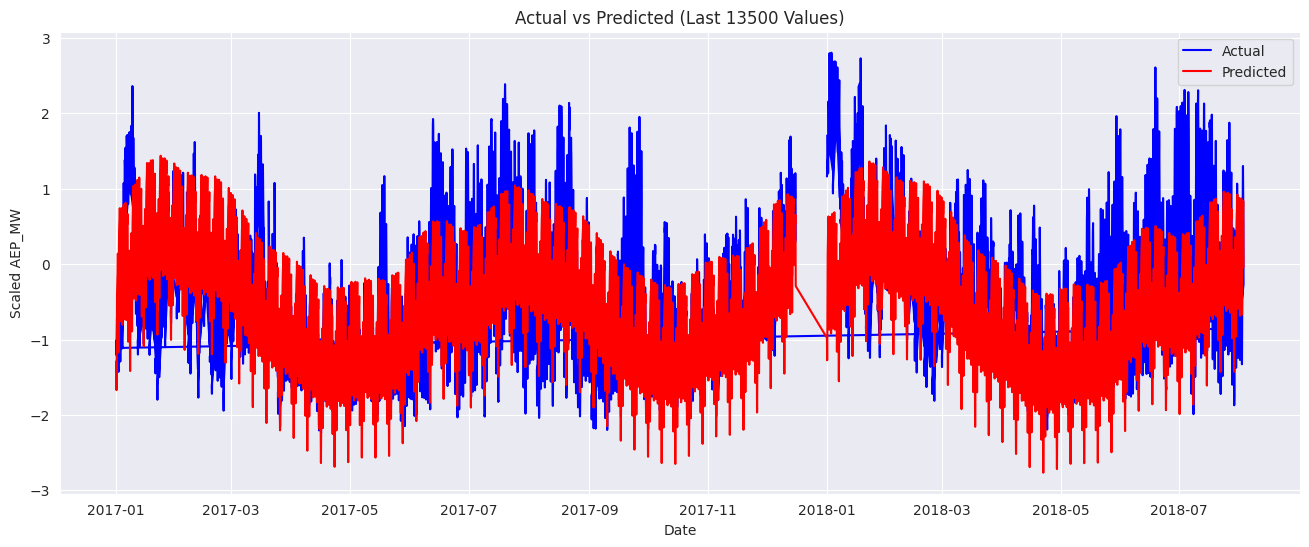

In [54]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(16, 6))

# Selecting last 13500 values from test data
test_last_13500 = test.tail(13500)

# Selecting corresponding predictions
pred_last_13500 = pred[pred['ds'].isin(test_last_13500['ds'])]

# Plotting actual test data
plt.plot(test_last_13500['ds'], test_last_13500['y'], label='Actual', color='blue')

# Plotting predicted data
plt.plot(pred_last_13500['ds'], pred_last_13500['yhat'], label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('Scaled AEP_MW')
plt.title('Actual vs Predicted (Last 13500 Values)')
plt.legend()
plt.show()


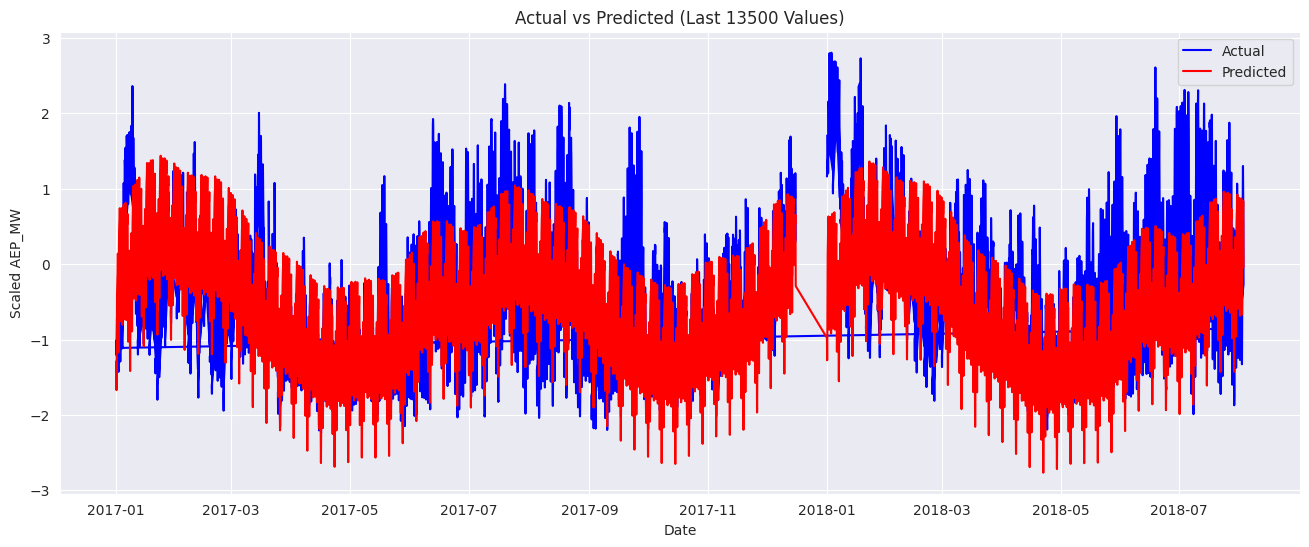

In [55]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(16, 6))

# Selecting last 13500 values from test data
test_last_13500 = test.tail(13500)

# Reindexing to ensure continuous date range
test_last_13500 = test_last_13500.set_index('ds').reindex(test_last_13500['ds'])

# Selecting corresponding predictions
pred_last_13500 = pred[pred['ds'].isin(test_last_13500.index)]

# Plotting actual test data
plt.plot(test_last_13500.index, test_last_13500['y'], label='Actual', color='blue')

# Plotting predicted data
plt.plot(pred_last_13500['ds'], pred_last_13500['yhat'], label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('Scaled AEP_MW')
plt.title('Actual vs Predicted (Last 13500 Values)')
plt.legend()
plt.show()
